In [59]:
# -------------清理数据后的数据展示---------------

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns


pima_data = pd.read_csv("../data/cleaned_pima_data.csv")

# 展示前5行数据
pima_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,33.6,0.627,50,1
1,1,85.0,66,26.6,0.351,31,0
2,8,183.0,64,23.3,0.672,32,1
3,1,89.0,66,28.1,0.167,21,0
4,0,137.0,40,43.1,2.288,33,1


In [60]:
# 看数据的形状
pima_data.shape

(768, 7)

In [61]:
pima_data.describe()


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.763021,32.464193,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.068193,6.928646,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
#  ---------------------- 查看各个列 0值的情况 ----------------------
col_lst = pima_data.columns
rows = pima_data.shape[0]
print("特征 - 特征0值的数量 - 特征0值的样本占比")
for col in col_lst:
    zeros_index_lst = list(pima_data.loc[pima_data[col] == 0].index)
    size_ = len(zeros_index_lst)
    print(col, "-", size_, "-", "{}{}".format(round((size_ / rows) * 100, 3), "%"))

特征 - 特征0值的数量 - 特征0值的样本占比
Pregnancies - 111 - 14.453%
Glucose - 0 - 0.0%
BloodPressure - 0 - 0.0%
BMI - 0 - 0.0%
DiabetesPedigreeFunction - 0 - 0.0%
Age - 0 - 0.0%
Outcome - 500 - 65.104%


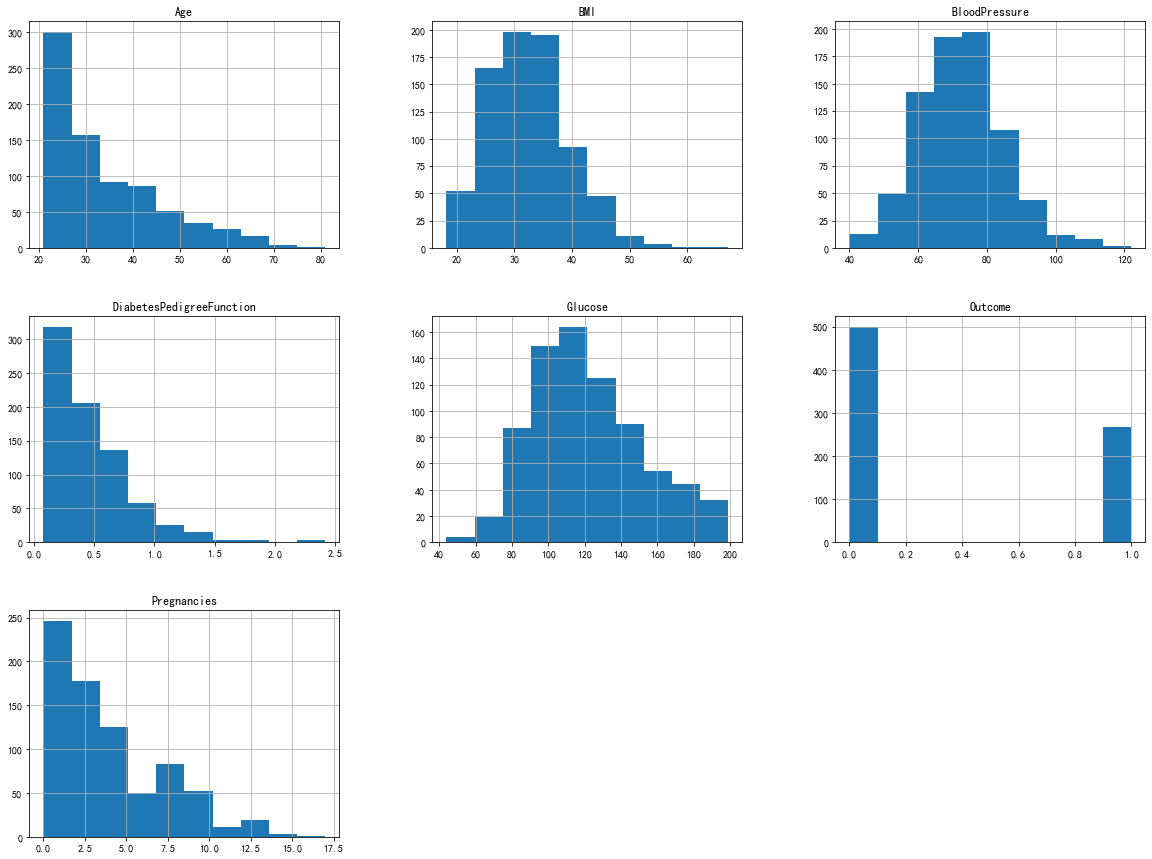

In [63]:
# ---------------------------- 可视化数据分布 ----------------------------
#  draw histogram
pima_data.hist(figsize=(20, 15))
mp.xlabel("features")
mp.ylabel("values")
mp.show()

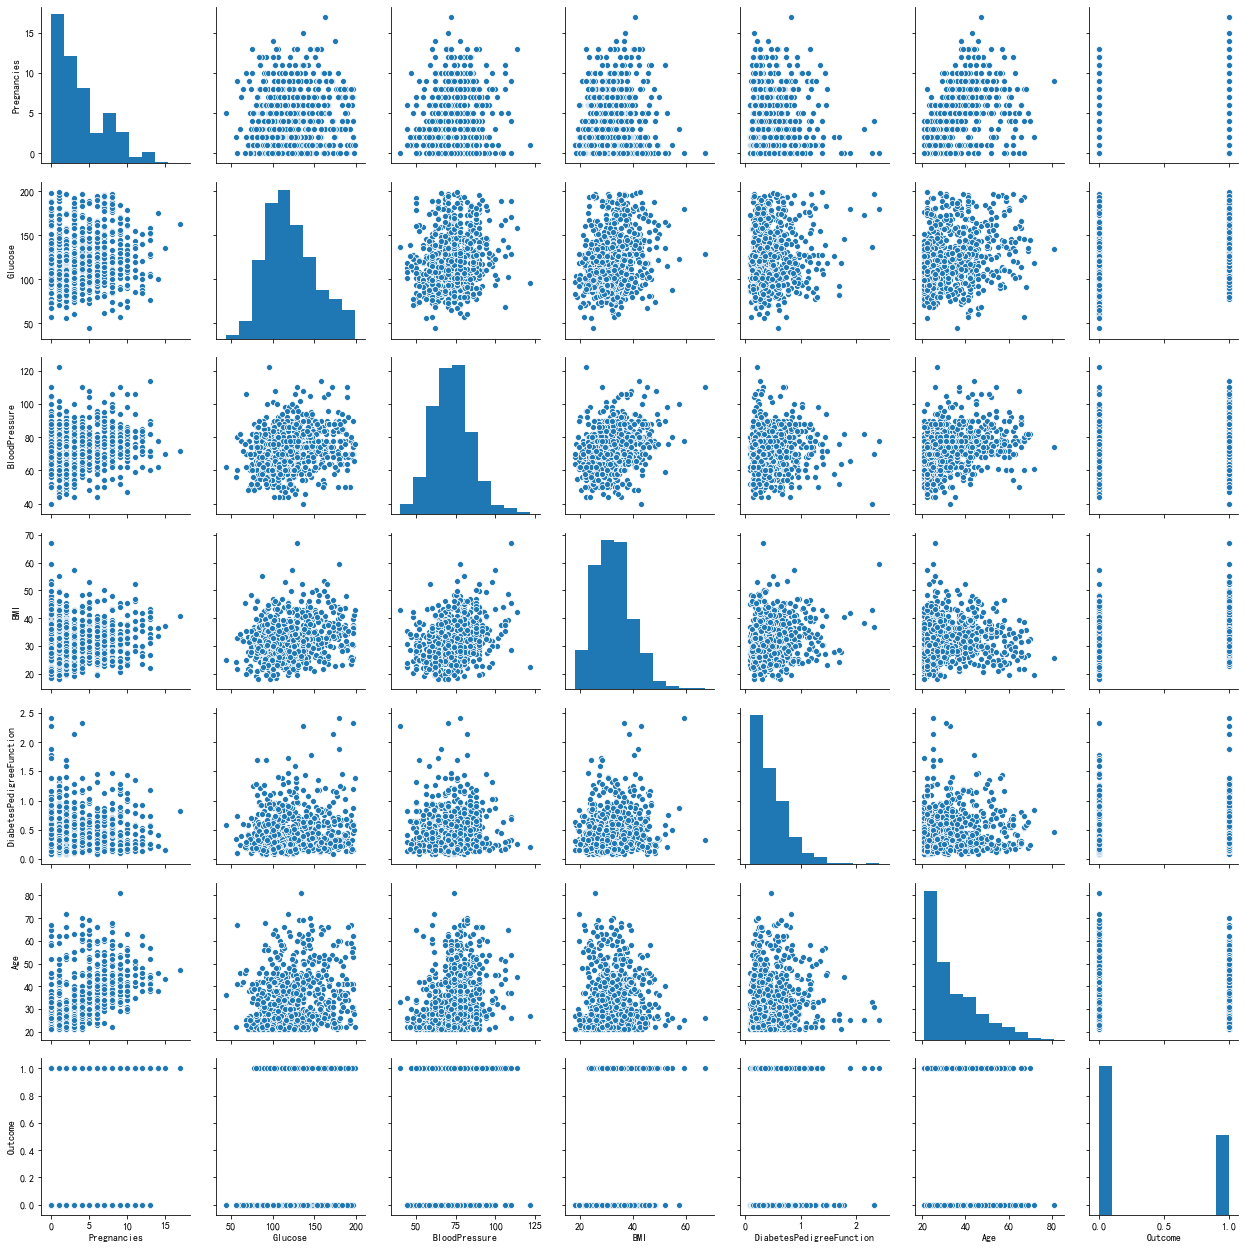

In [64]:
#  draw pairplot
sns.pairplot(pima_data)
mp.show()

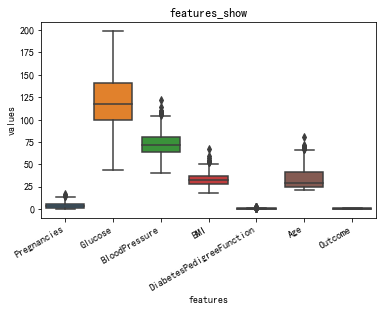

In [65]:
#  draw  boxplot
mp.figure("features_show")
mp.title("features_show")
sns.boxplot(data=pima_data)
mp.gcf().autofmt_xdate()
mp.xlabel("features")
mp.ylabel("values")
mp.show()

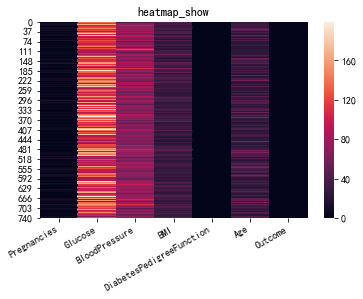

In [66]:
# draw heatmap  各个特征数值分布
mp.figure("heatmap_show")
mp.title("heatmap_show")
sns.heatmap(data=pima_data)
mp.gcf().autofmt_xdate()
mp.show()




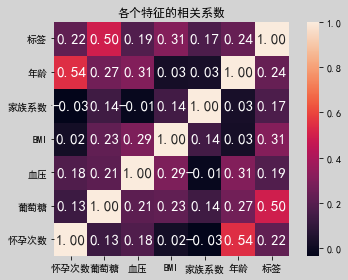

'\n由此可见:\n标签(即糖尿病) 与葡萄糖的关系最大,高达0.50, 呈现正相关,其次是BMI是0.31, 第三是年龄是0.24\n年龄和怀孕数关系最大,相关系数值高达0.54,呈现正相关关系,  其次是血压是0.31, 第三是葡萄糖0.27,第四是糖尿病\nDiabetesPedigreeFunction(家族系数) 和各个特征的值关系不大\n'

In [67]:
# draw heatmap  计算数据：　皮尔逊积矩相关系数　　　各个特征的相关系数
cols = ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
chinese_features = ["怀孕次数", "葡萄糖", "血压", "BMI", "家族系数", "年龄", "标签"]
df_corr = pima_data[cols].corr()

mp.rcParams['font.sans-serif'] = ['SimHei']
mp.rcParams['axes.unicode_minus'] = False
mp.figure("各个特征的相关系数", facecolor="lightgray")
mp.title("各个特征的相关系数")
sns.heatmap(df_corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
            yticklabels=chinese_features, xticklabels=chinese_features)
mp.tight_layout()
mp.xlim(0, 7)
mp.ylim(0, 7)
mp.show()
"""
由此可见:
标签(即糖尿病) 与葡萄糖的关系最大,高达0.50, 呈现正相关,其次是BMI是0.31, 第三是年龄是0.24
年龄和怀孕数关系最大,相关系数值高达0.54,呈现正相关关系,  其次是血压是0.31, 第三是葡萄糖0.27,第四是糖尿病
DiabetesPedigreeFunction(家族系数) 和各个特征的值关系不大
"""

In [68]:
df_corr

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129867,0.182810,0.019609,-0.033523,0.544341,0.221898
Glucose,0.129867,1.000000,0.214224,0.226983,0.138125,0.268566,0.495954
BloodPressure,0.182810,0.214224,1.000000,0.294717,-0.009569,0.305952,0.187440
BMI,0.019609,0.226983,0.294717,1.000000,0.144562,0.025866,0.310456
DiabetesPedigreeFunction,-0.033523,0.138125,-0.009569,0.144562,1.000000,0.033561,0.173844
Age,0.544341,0.268566,0.305952,0.025866,0.033561,1.000000,0.238356
Outcome,0.221898,0.495954,0.187440,0.310456,0.173844,0.238356,1.000000


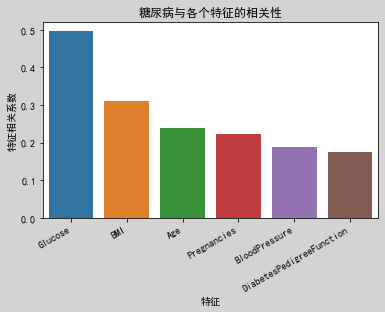

In [69]:
# draw bar 糖尿病对应各个特征的相关性
mp.figure("糖尿病与各个特征的相关性", facecolor="lightgray")
mp.title("糖尿病与各个特征的相关性")
df_barplot = df_corr["Outcome"].sort_values()[::-1].drop("Outcome")
sns.barplot(list(df_barplot.index), df_barplot)
mp.gcf().autofmt_xdate()
mp.xlabel("特征")
mp.ylabel("特征相关系数")
mp.show()